# Degree Distribution


In [4]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import seaborn as sb
import pandas as pd

mpl.style.use('report_style.mplstyle')

In [5]:
prop_committed = 0.03
beta_non_committed = 0.2759
beta_committed = 0.2759
ensemble_size = 10
run_length = 10**5
q = 1
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [34]:
for i in social_structures:
    run_ensemble_experiment(prop_committed, beta_non_committed, beta_committed, ensemble_size, run_length, i, q)

100%|██████████| 1/1 [00:00<00:00, 53.51it/s]


[-0.5    0.525  1.55   2.575  3.6    4.625  5.65   6.675  7.7    8.725
  9.75  10.775 11.8   12.825 13.85  14.875 15.9   16.925 17.95  18.975
 20.    21.025 22.05  23.075 24.1   25.125 26.15  27.175 28.2   29.225
 30.25  31.275 32.3   33.325 34.35  35.375 36.4   37.425 38.45  39.475
 40.5  ]


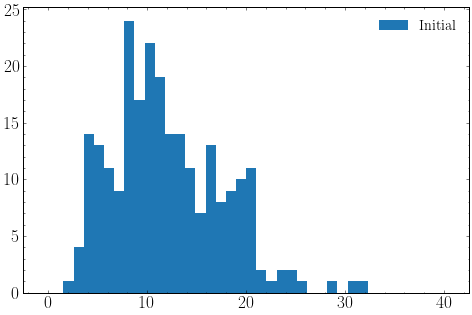

(0.0, 40.0)

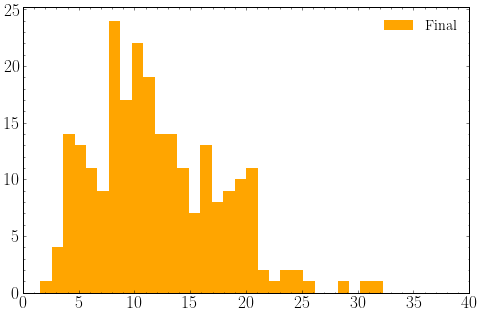

In [10]:
### set params and load data
social_structure = 'LyonSchool'
output_fname = f'{social_structure}_{prop_committed}_{beta_non_committed}_{beta_committed}_{run_length}_{ensemble_size}'
data = pd.read_csv(f'aux_outputs/{output_fname}.csv', header=None)
###

### split data according to how it is written into the file
initial_deg = data.iloc[0::4].to_numpy(dtype=int)
# rewire_freq = data.iloc[1::4].to_numpy(dtype=np.int64)[:,0]
final_deg = data.iloc[2::4].to_numpy(dtype=int)
final_vocab = data.iloc[3::4].values.tolist()
###


### plot the initial and final degree distributions in the same bins
plt.figure(1)
same_bin_edges = np.linspace(-0.5, 40.5, num=41)
print(same_bin_edges)

#initial_bin_edges = np.histogram_bin_edges(initial_deg, bins=20)
initial_deg_binned_freq = plt.hist(initial_deg[0], bins=same_bin_edges, label='Initial')
plt.legend()
plt.show()
#final_bin_edges = np.histogram_bin_edges(final_deg, bins=20)
final_deg_binned_freq = plt.hist(final_deg[0], bins=same_bin_edges, label='Final', color = 'orange')
plt.legend()
plt.xlim((0, 40))
###